# Lab 3

|DAVE3625|Lab 3|Oblig 1|
|--------|-----|-------|

#### Some notes about the lab
- Since i have done lab 3 in one notebook, i have two different df.
- df = the one that contains fake data
- dfplanes =  the plane with departue times 

#### Porpouse of generating fake data

The most imporant reason to generate fake data is privacy. This is aspecially important for traing AI models, as this makes sure that the privacy of the end user is ensured and you can train your Ai model before providing properly data. Fake data is also important for testing propourses [K2View](https://www.k2view.com/blog/generate-fake-data/). You can also conserve resources, with means that you can generate more data with the same power. 

Please refer to the code comments, as this will be the main way for me to comment on how the code works

In [21]:
#imports, in this first part we mainly use faker and pandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from faker import Faker; 
import pandas as pd; 
from faker.providers.credit_card import Provider as creditcardProivder; 


df = pd.DataFrame(columns=['Navn', 'Adresse', 'PersonNr', 'CreditCard', 'ipv4']) #Used to define what the different columbs are
#Colums: Navn, Adresse, PersonNr, Creditcard, ipv4
fake = Faker(['no_NO']) #decides the condition for the fake credential -> this instance, we can see the that is use Norwegian setting 
#Uses a for loop to add the fake data. 
for i in range(0,100):
    row=fake.name(),fake.address(),fake.ssn(),fake.credit_card_number(), fake.ipv4()
    df.loc[i]=row

df.head() # To Make sure that the data is shown properly and the dataset looks good (at least at first glance)

,Navn,Adresse,PersonNr,CreditCard,ipv4
0,Bjørg-Karoline Eliassen,"Tveitstranda 9F, 0295 Emilvik",06089904402,4693644418269,36.226.40.123
1,Håkon Ruud,"Nielsenvollen 7, 8347 Sæther",19066427180,341953269481501,17.41.198.86
2,Nils Sandvik,"Eriksenåsen 31, 2691 Tangen",17064829130,4201195950028427517,155.26.221.209
3,Espen Johannessen,"Ellingsenvika 73, 6823 Berg",30065213318,3528363502550907,113.191.139.19
4,Elise Pedersen,"Rasmussenløkka 8, 0489 Karlsen",12024707804,3534469982485332,129.219.220.88


Task 2: data anonymization

In [22]:
#Waiting for answear from TAs, due to the issues with landromomat

## explaination of the code provided from the TAs  
**NOTE:** *Due to the import issues i will try to explian in this markdown block on how the code could have worked*

```


```


## Part 2: Plane and delays (Task 3)

### Task 3: Time Series 

In This task we will try to understand more about how it is to work with time in pandas.

To start with we import the dataset from github, this is a big dataset, so we import a raw csv file

It is also important to note that all that this method in the dataset does not take in account when the planes arrives eary, as it removes all the negative signs with the absolute value. So the dataset has a much higher max value than minimal value, as the minimal value has a value 0, while max is at ≃ 2800 percent. 
see coments in code to understand more


In [23]:
dfPlanes = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv') # Loading data

# dfPlanes.head() used to confirmed that the data was loaded
dfPlanes['dep_time'] = pd.to_datetime(dfPlanes['dep_time'], errors="coerce") #doge errors, and chages the data to time
dfPlanes['arr_time'] = pd.to_datetime(dfPlanes['arr_time'], errors="coerce") #doge errors, and changes the data to time
dfPlanes['sched_arr_time'] = pd.to_datetime(dfPlanes['sched_arr_time'], errors="coerce") #doge erros, and changes the data to time
dfPlanes['airTime'] = abs(dfPlanes['dep_time'] - dfPlanes['arr_time']) #uses the abs function in python to controll negative number and calculate airtime
dfPlanes['delay'] = abs(dfPlanes['arr_time'] - dfPlanes['sched_arr_time']) #calculates the delay. 


dfPlanes.head() #alyways makes sure that the data is OK



,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,airTime,delay
0,0,2013-1-1 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-1-1 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:25:00
2,2,2013-1-1 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-1-1 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-1-1 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:08:00


## showing the percent of delay 

In this part we use the percentage formula to calculate what precentage it is, this could be affected by the previous data. then we assign the precentage to a seperate row.

we use the formula:
(100 * part)/possible part

I choose to create a scatter plot, however, this is not optimal

We also dont see the planes that have arrived early, this cloud be due to the dataset. And the solution that were suggested would also not include the early arrival time. 

count    121373.000000
mean         23.640192
std          79.094621
min           0.000000
25%           5.161290
50%          11.515152
75%          22.222222
max        2879.591837
Name: PrecentDelay, dtype: float64

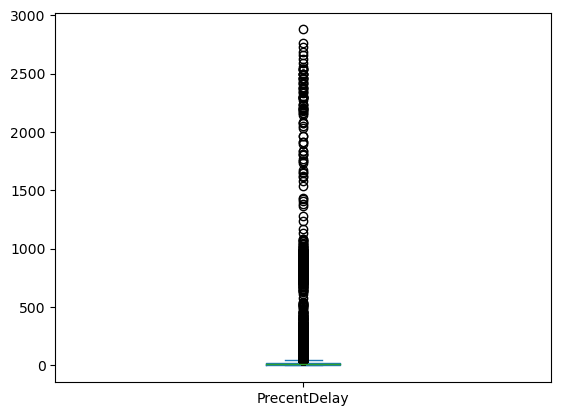

In [24]:

dfPlanes['PrecentDelay'] = (100 * dfPlanes['delay'])/dfPlanes['airTime'] # find the percentage
dfPlanes['PrecentDelay'].plot.box() #plotbox, before removing outliers
dfPlanes['PrecentDelay'].describe() #check the different values, to check the max value. 
#dfPlanes.head()



## creating a scatterplot

i decided to step away from the lab and include the lower and higher five percent., after seeing that the plot was a bit wierd, i tried to cut the 

In [25]:
from pandas.api.types import is_numeric_dtype
#removes the outlier, from the lab
def remove_outlier(df): 
    low = 0.5 #defines the lower
    high = 0.95 #defines the highes
    quant_df = df.quantile([low,high]) #defines the quantile of the dataset, between 5 and 95 percent
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])] # partitions the part that use the quantile
    return df 

<Axes: xlabel='PrecentDelay', ylabel='dest'>

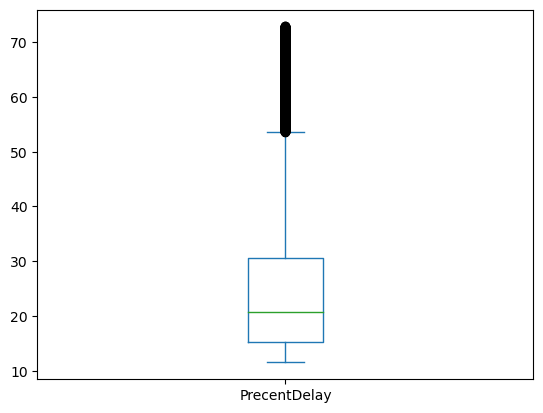

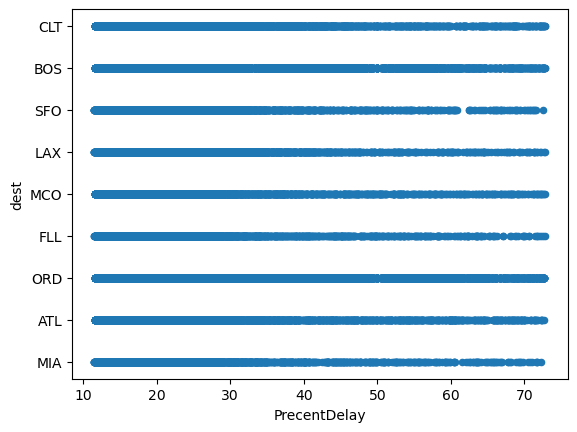

In [26]:

dfPlanes['PrecentDelay'] = remove_outlier(dfPlanes['PrecentDelay']) #removes the outliers
dfPlanes['PrecentDelay'].plot.box() #creates the plotbox
dfPlanes.plot.scatter(x='PrecentDelay', y = 'dest') #creates a scatter plot